#### The Reuters dataset
We’ll work with the Reuters dataset, a set of short newswires and their topics, published by Reuters in 1986. It’s a simple, widely used toy dataset for text classification. There are 46 different topics; some topics are more represented than others, but each topic has at least 10 examples in the training set.

In [1]:
from keras.datasets import reuters

Using TensorFlow backend.


In [2]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [3]:
import numpy as np
import pandas as pd
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# restore np.load for future normal usage
np.load = np_load_old

In [4]:
train_data.shape,len(train_labels), test_data.shape, len(test_labels)

((8982,), 8982, (2246,), 2246)

In [5]:
max([max(sequence) for sequence in train_data])

9999

In [6]:
word_index = reuters.get_word_index()
num_to_word_map = {num:word for word, num in word_index.items()}


557056/550378 [==============================] - 22s 40us/step


In [8]:
decode_review = ' '.join([num_to_word_map.get(i-3,'?') for i in train_data[5]])
decode_review

"? the u s agriculture department estimated canada's 1986 87 wheat crop at 31 85 mln tonnes vs 31 85 mln tonnes last month it estimated 1985 86 output at 24 25 mln tonnes vs 24 25 mln last month canadian 1986 87 coarse grain production is projected at 27 62 mln tonnes vs 27 62 mln tonnes last month production in 1985 86 is estimated at 24 95 mln tonnes vs 24 95 mln last month canadian wheat exports in 1986 87 are forecast at 19 00 mln tonnes vs 18 00 mln tonnes last month exports in 1985 86 are estimated at 17 71 mln tonnes vs 17 72 mln last month reuter 3"

In [9]:
train_labels[5]

4

In [11]:
# 46 class labels
max(train_labels)

45

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
dict(Counter(train_labels)).keys()

dict_keys([3, 4, 16, 19, 8, 21, 11, 1, 13, 20, 18, 25, 35, 9, 38, 10, 28, 2, 6, 12, 7, 30, 34, 15, 14, 32, 41, 40, 45, 23, 42, 26, 24, 37, 27, 31, 39, 0, 22, 33, 36, 17, 43, 29, 44, 5])

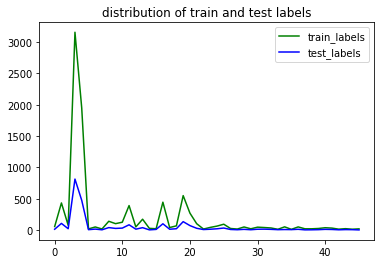

In [42]:
from collections import Counter
train_d = dict(sorted(dict(Counter(train_labels)).items()))
test_d = dict(sorted(dict(Counter(test_labels)).items()))
plt.plot(list(train_d.keys()), list(train_d.values()), 'g', label='train_labels')
plt.plot(list(test_d.keys()), list(test_d.values()), 'b', label='test_labels')
plt.title('distribution of train and test labels')
plt.legend()
plt.show()

In [63]:
# preparing the data for neural network
def vectorize_sequence(sequence, dimensions=10000):
    results = np.zeros((len(sequence), dimensions))
    for index,value in enumerate(sequence):
        results[index, value] = 1
    return results
x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [64]:
# Building the model
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [65]:
# compile the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [66]:
# validating the approach
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_val = one_hot_train_labels[1000:]

In [67]:
history = model.fit(partial_x_train, partial_y_val, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 211us/step - loss: 2.5331 - acc: 0.5090 - val_loss: 1.7020 - val_acc: 0.6360
Epoch 2/20
7982/7982 [==============================] - 1s 72us/step - loss: 1.3960 - acc: 0.7088 - val_loss: 1.2802 - val_acc: 0.7190
Epoch 3/20
7982/7982 [==============================] - 1s 70us/step - loss: 1.0319 - acc: 0.7816 - val_loss: 1.1222 - val_acc: 0.7530
Epoch 4/20
7982/7982 [==============================] - 1s 71us/step - loss: 0.8106 - acc: 0.8302 - val_loss: 1.0197 - val_acc: 0.7830
Epoch 5/20
7982/7982 [==============================] - 1s 70us/step - loss: 0.6449 - acc: 0.8695 - val_loss: 0.9661 - val_acc: 0.8020
Epoch 6/20
7982/7982 [==============================] - 1s 70us/step - loss: 0.5139 - acc: 0.8951 - val_loss: 0.9057 - val_acc: 0.8120
Epoch 7/20
7982/7982 [==============================] - 1s 71us/step - loss: 0.4160 - acc: 0.9154 - val_loss: 0.9087 - val_acc: 0.8030
Epoch 

In [68]:
acc = history.history['acc']
loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

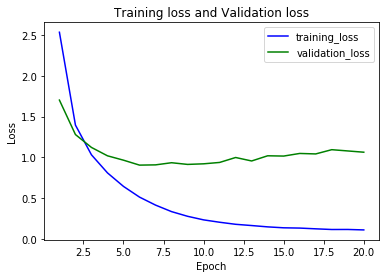

In [69]:
plt.plot(range(1,len(loss)+1), loss, 'b', label='training_loss')
plt.plot(range(1, len(val_loss)+1), val_loss, 'g', label='validation_loss')
plt.title('Training loss and Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
# what matters for us more is green line.

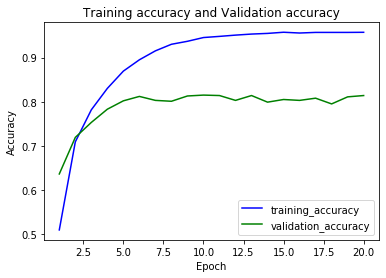

In [70]:
plt.plot(range(1, len(acc)+1), acc, 'b', label='training_accuracy')
plt.plot(range(1, len(val_acc)+1), val_acc, 'g', label='validation_accuracy')
plt.title('Training accuracy and Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# what matters for us more is green line.

In [71]:
# Since our model is overfitted after epoch 4.
# we'll retrain out for 4 epoch, and will not use validation set this as we don't need validation now.
# i.e validation set is used to find the hyperparameters. and we have found one hyperparameter using val.data (epoch=4)
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer = 'rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, one_hot_train_labels, epochs=9, batch_size=512)
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
8982/8982 [==============================] - 2s 183us/step - loss: 2.4612 - acc: 0.5310
Epoch 2/9
8982/8982 [==============================] - 1s 77us/step - loss: 1.3066 - acc: 0.7228
Epoch 3/9
8982/8982 [==============================] - 1s 68us/step - loss: 0.9778 - acc: 0.7891
Epoch 4/9
8982/8982 [==============================] - 1s 74us/step - loss: 0.7658 - acc: 0.8400
Epoch 5/9
8982/8982 [==============================] - 1s 70us/step - loss: 0.6105 - acc: 0.8759
Epoch 6/9
8982/8982 [==============================] - 1s 63us/step - loss: 0.4816 - acc: 0.9015
Epoch 7/9
8982/8982 [==============================] - 1s 63us/step - loss: 0.3918 - acc: 0.9184
Epoch 8/9
8982/8982 [==============================] - 1s 69us/step - loss: 0.3159 - acc: 0.9304
Epoch 9/9
2246/2246 [==============================] - 0s 208us/step


In [72]:
results

[0.9580117197622705, 0.7965271594475554]

This approach reaches an accuracy of ~80%. With a balanced binary classification problem, the accuracy reached by a purely random classifier would be 50%. But in this case it’s closer to 19%, so the results seem pretty good, at least when compared to a random baseline:

In [79]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels_copy == test_labels)
float(np.sum(hits_array)) / len(test_labels)

0.19323241317898487